In [94]:
import pandas as pd
import numpy as np

# Download data
First of all, it is necessary to load our dataset. But Already on this step we have a problem. Our dataset in txt file without any headers. I've saved our data in csv, and have tried to download them. The attempt was unsuccessful due to missing headers. After reading the documentation I could be able to call the columns and download my data.

In [95]:
data=pd.read_csv("drug_consumption.csv",header=None,names=["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS","Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstacy","Heroin","Ketamine","Legalh","LSD","Meth","Mushroom","Nicotine","Semer","VSA"])

In [96]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


I've read about five personality measurements and they represented in our data like this:
1. Neuroticism(Nscore): Neuroticism identifies certain people who are more prone to psychological stress.
2. Agreeableness(Ascore): A tendency to be compassionate and cooperative rather than suspicious and antagonistic towards others.
3. Extraversion(Escore): Energy, positive emotions, surgency, assertiveness, sociability and the tendency to seek stimulation in the company of others, and talkativeness.
4. Conscientiousness(Cscore): A tendency to be organized and dependable, show self-discipline, act dutifully, aim for achievement, and prefer planned rather than spontaneous behavior.
5. Openness to experience(Oscore): Appreciation for art, emotion, adventure, unusual ideas, curiosity, and variety of experience. Openness reflects the degree of intellectual curiosity, creativity and a preference for novelty and variety a person has.

We also have "SS" - sensation seeing and "impulsive".

It was written that data has been normalized and it is clear after looking for the decription. 
I've also tried to restore original data because it was encoded to the data set not very good (just by numbers from meannings) but come to the decision that we have this dataset and we should firstly work with this data


In [97]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


The last column that we see here is 'SS' due to the type of other columns. Let's look what we have after SS

In [98]:
y =data.drop(["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"], axis=1)

In [99]:
X = data.drop(["Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstacy","Heroin","Ketamine","Legalh","LSD","Meth","Mushroom","Nicotine","Semer","VSA"], axis = 1)

Here we succussfully load and split the data. 
And we are ready to 
# prepare our dataset: 
encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation.

In our dataset we have more targets than features! It would be necessary to preprocess our targets otherwise there would be not enough features to analysis. 
On this step I could make a ssuggestion that drug consumption is depends on country because of different legislation. Country also influence on menatality, we will check our suggestions by looking how our features depends(we have 5 personality measurements)

First of all, let's drop ID (it's not the characteristic) and normalize the data. Despite that it was written that data were normalized, the columns have different maximums and minimums. They also contain negative values. Let's make them more smoothly. It would help us in learning models. 
We need to use feature_range=(0, 1) for correct range of our data

In [102]:
from sklearn.preprocessing import minmax_scale
X_norm =minmax_scale(X.drop('ID',axis = 1), copy=True, feature_range=(0, 1))
a = (X.drop('ID',axis = 1).columns)
X_norm=pd.DataFrame(X_norm)
X_norm.columns = a
print(X_norm.describe())

               Age       Gender    Education      Country    Ethnicity  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.278405     0.499735     0.550215     0.604629     0.264556   
std       0.247867     0.500133     0.214936     0.457463     0.055146   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.412820     0.000000     0.262143   
50%       0.246475     0.000000     0.537681     1.000000     0.262143   
75%       0.409137     1.000000     0.653938     1.000000     0.262143   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Nscore       Escore       Oscore       Ascore       Cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.514137     0.499975     0.530058     0.499965     0.499944   
std       0.148125     0.152332     0.161318     0.143957     0.143969   
min       0.000000     0.000000     0

In [101]:
y.describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
count,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885,1885
unique,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7
top,CL5,CL0,CL0,CL0,CL6,CL6,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
freq,759,976,1305,1000,1385,463,807,1038,1627,1021,1605,1490,1094,1069,1429,982,610,1877,1455


What do we see here? I've never heard about such types of drugs.. If i knew something, I'd try to group drugs. 
We have 7 unique values in each column (except semer) 
and now we could try to encode categorical variables
It seems that we can but:
1. We have 19 targets! 
2. Each target consists of 7 (despite semer) unique values. If we try to encode values like it was in the lecture we will recieve exactly 131 output in the target. It would be very hard to work with 
3. That's why I suggest another approach to the target encoding. We can do it in different ways.
4. 
    1. We can drop most of the Targets except random 1 and try to predict it's consumption
    2. We can summarize our targets and try to predicr wether person would use drugs at all or not
    
In both case first of all we need to encode CL0-6 to numbers. We need to konw that:
1. CL0 Never Used 
2. CL1 Used over a Decade 
3. CL2 Used in Last Decade
4. CL3 Used in Last Year 
5. CL4 Used in Last Month
6. CL5 Used in Last Week 
7. CL6 Used in Last Day

This names are like a degree of usge, that's why we can map them into the numbers from 0 to 6

In [107]:
y.shape

(1885, 19)

In [103]:
#we can do it without dctionary on regular equations but it's much more slower
#import re
#for j in range(0, y.shape[0]):
for i in range(0, y.shape[1]):
    y.iloc[:,i] = y.iloc[:,i].map({"CL0":0, "CL1":1,"CL2":2, "CL3":3, "CL4":4, "CL5":5, "CL6":6, "CL7":7})
    #do the same as  above but without dictionary
        #y.iloc[j,i] = re.findall(r'\d+',y.iloc[j,i]) 

In [104]:
y = y/6

Let's normalize it.  Due to the reason that we have data from 0 to 6, we can easily normalize them

In [106]:
y.describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Nicotine,Semer,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.772502,0.223431,0.101149,0.244209,0.913970,0.498232,0.851105,0.193546,0.049602,0.219010,0.062334,0.094872,0.225995,0.176923,0.137754,0.197878,0.533422,0.001592,0.072237
std,0.221875,0.297264,0.177368,0.311213,0.185775,0.381240,0.181552,0.252172,0.139509,0.274595,0.172463,0.203336,0.298275,0.248517,0.274439,0.244390,0.402322,0.026555,0.160396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.000000,0.000000,0.000000,0.833333,0.166667,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
50%,0.833333,0.000000,0.000000,0.000000,1.000000,0.500000,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
75%,1.000000,0.333333,0.166667,0.500000,1.000000,0.833333,1.000000,0.333333,0.000000,0.500000,0.000000,0.000000,0.500000,0.333333,0.000000,0.333333,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000


We will encode our target into binary value, where C0 - 0 (never used) and CL-C6 - used. Is it a good way? We are going to start with threshold = 0 (only CL0 - 0) and then try to change it. 

Let's visualize our results and try to find any dependencies between different drugs' consumption

In [108]:
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

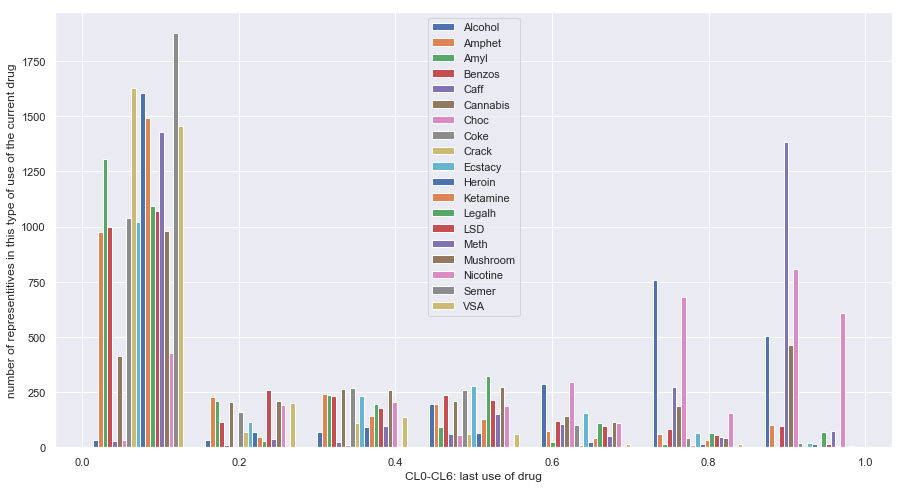

In [109]:
plt.figure(figsize=(15,8))
plt.hist(y.values, bins= 7, data =y, label = y.columns); # we have 7 types of frequencis. That's why we have 7 bins
plt.xlabel('CL0-CL6: last use of drug')
plt.ylabel('number of representitives in this type of use of the current drug')
plt.legend()

Most people are dedicated to "never used" but we have some drug-users here. We also have some high bins that doen't looks like the most part of the bins. Let's find them 

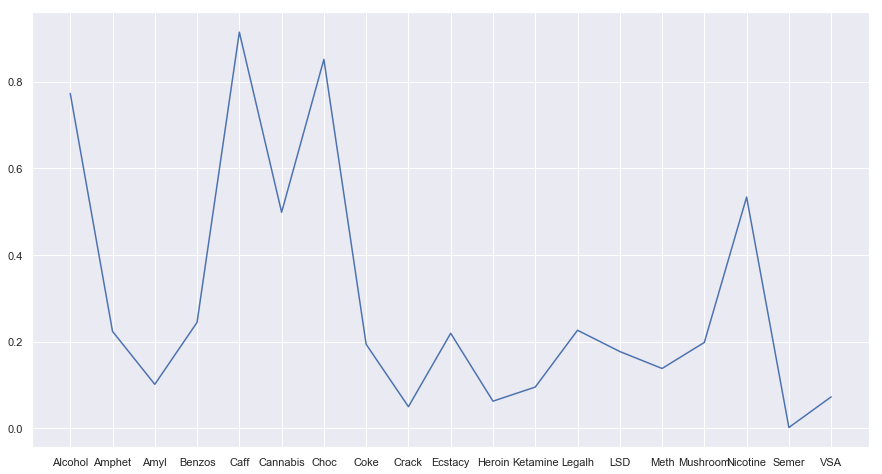

In [115]:
me = y.mean()
plt.figure(figsize=(15,8))
plt.plot(me);

In [116]:
for i in range(0, y.shape[1]):
    if (me[i]>0.5):
        print(y.columns.values[i])
print("")
for i in range(0, y.shape[1]):
    if ((me[i]<0.5)&(me[i]>0.4)):
        print(y.columns.values[i])

Alcohol
Caff
Choc
Nicotine

Cannabis


There we see some points over the 50% of  "average usage". Let's have a look what is it?

We recieve alcohol, caff, choc and nicotine. All of them are not drugs in widely spread meaning. They are not prohibited and we see how widely they are used. I suggest to drop them from targets. May be we will use them in learning procedure as features later. 
We have another big peack(more than 0.4) for cannabis. 
We will also try to predict the usage of this drug. But now we will drop it. 

In [117]:
a=[]
for i in range(0, y.shape[1]):
    if (me[i]>0.4):
        a.append(y.columns.values[i])
y_dr = y
y_dr = y_dr.drop(a, axis = 1)

In [119]:
print(y.shape)
print(y_dr.shape)

(1885, 19)
(1885, 14)


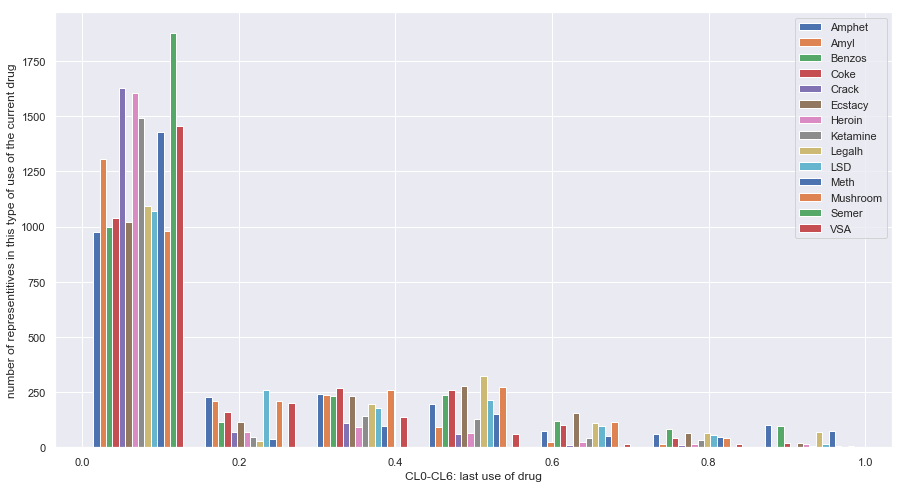

In [482]:
plt.figure(figsize=(15,8))
plt.hist(y_dr.values, bins= 7, data =y_dr, label = y_dr.columns); # we have 7 types of frequencis. That's why we have 7 bins
plt.xlabel('CL0-CL6: last use of drug')
plt.ylabel('number of representitives in this type of use of the current drug')
plt.legend()

The same histogram but with dropped value. It's much more smoother. 

In [144]:
y_dr.describe()

,Amphet,Amyl,Benzos,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Semer,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.223431,0.101149,0.244209,0.193546,0.049602,0.219010,0.062334,0.094872,0.225995,0.176923,0.137754,0.197878,0.001592,0.072237
std,0.297264,0.177368,0.311213,0.252172,0.139509,0.274595,0.172463,0.203336,0.298275,0.248517,0.274439,0.244390,0.026555,0.160396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.166667,0.500000,0.333333,0.000000,0.500000,0.000000,0.000000,0.500000,0.333333,0.000000,0.333333,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000


Text(0.5, 1.0, ' target mean values without Alcohol, Caff, Choc, Nicotine, Cannabis ')

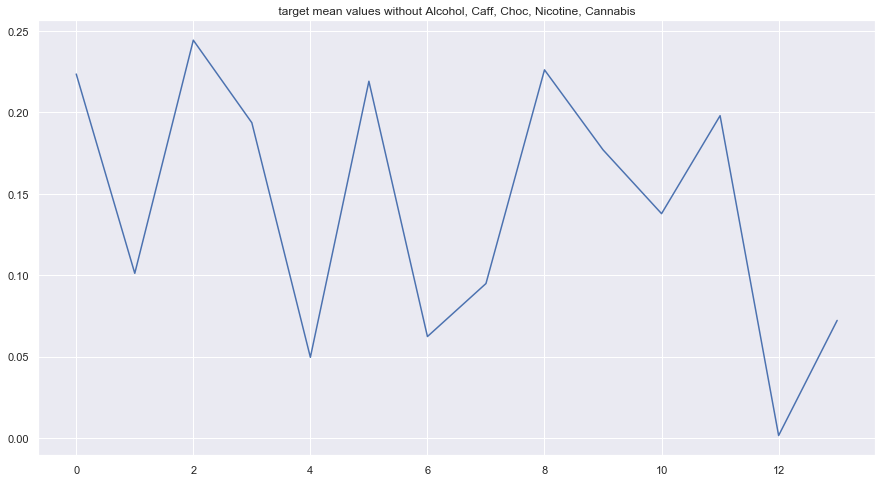

In [121]:
plt.figure(figsize=(15,8))
plt.plot(y_dr.mean().values);
plt.title(' target mean values without Alcohol, Caff, Choc, Nicotine, Cannabis ')

Now we have 14 targets and my suggestion is to predict wether the person would use any drugs or not. We will drop all NaN values here, and create a binary target. We read in description that there are no NaN values, Let's check it

And here we have one more problem: how to say wether the person is drug-user or not? Let's go back to Target description. We have  CL0 Never Used CL1 Used over a Decade CL2 Used in Last Decade CL3 Used in Last Year CL4 Used in Last Month CL5 Used in Last Week CL6 Used in Last Day. Let's map our Targets to 0 and 1, whether 0 dedicated to not-drug-user and 1 addict, it seems logically correct, beacause we can't call the person who didn't use any drugs for more than a year an addict. 
That's why we map CL0-CL2- 0, CL3 - 1

We will also try another mapping and change the balance 

In [25]:
y.isnull().values.any()

False

In [26]:
X.isnull().values.any()

False

In [27]:
print(y.shape)

(1885, 14)


On this step I'll create some targets, I'll start with preprocessing of them. And here the most important parameter is threshold: 
0 means that only CL0 goes to 0, but it's not in our context. We are going to encode CL0-CL3  as 0, C4-C6 as 1. In description it was written that it better to mark only CL0-CL1 as 0 and CL1-CL6 as 1. 
Let's do both and decide it later. 

With 0 threshold we will lose Semer category at all

We will also do the same to target with dropped columns

In [122]:
from sklearn.preprocessing import Binarizer
def threshbin(threshold, y ):
    binar = Binarizer(copy=True, threshold=threshold).fit(y) # copy to new target 
    return binar.transform(y)

In [136]:

y_all_1 =pd.DataFrame(threshbin(1/6+0.01, y))
y_all_2 = pd.DataFrame(threshbin(2/6+0.01, y))
y_all_3 = pd.DataFrame(threshbin(3/6+0.01, y))
y_dr_1 =pd.DataFrame(threshbin(1/6+0.01, y_dr))
y_dr_2 = pd.DataFrame(threshbin(2/6+0.01, y_dr))
y_dr_3 = pd.DataFrame(threshbin(3/6+0.01, y_dr))

In [142]:
#return our headers
y_all_1.columns = y.columns
y_all_2.columns = y.columns
y_all_3.columns = y.columns
y_dr_1.columns = y_dr.columns
y_dr_2.columns = y_dr.columns
y_dr_3.columns = y_dr.columns

In [143]:
y_all = pd.DataFrame(y_dr_3)
y_all.describe()

,Amphet,Amyl,Benzos,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Semer,VSA
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.12626,0.021751,0.158621,0.084350,0.010610,0.127321,0.028117,0.041910,0.127851,0.088064,0.090716,0.084350,0.000531,0.018037
std,0.33223,0.145907,0.365419,0.277986,0.102485,0.333421,0.165350,0.200436,0.334013,0.283463,0.287281,0.277986,0.023033,0.133121
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


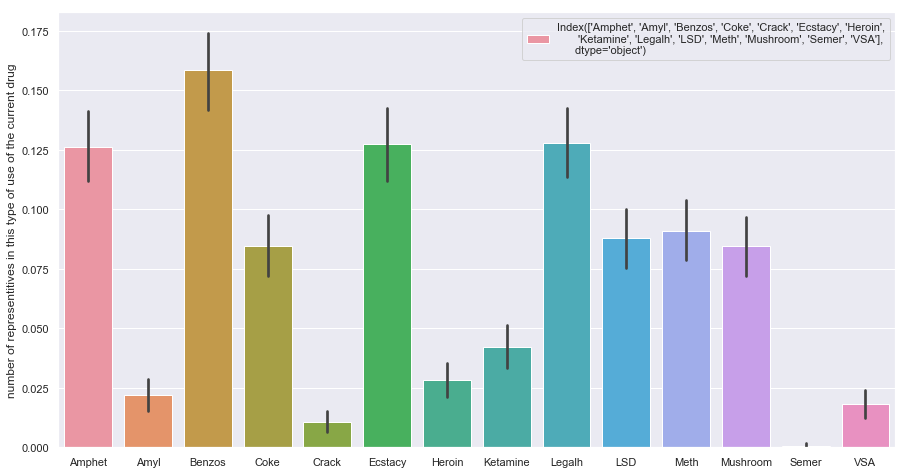

In [152]:
plt.figure(figsize=(15,8))
sns.barplot(data =y_dr_3, label = y_dr_3.columns); 
plt.ylabel('number of representitives in this type of use of the current drug')
plt.legend()

And ther we see mean and variance for each type of drug. We also could say how popular this or that drug. And we have a vey unbalanced dataset. On some drug we have very low number of people(Semer for example).
We can divide our drugs in 3 groups, like it was in the article, but this three groups doen't cover all of drugs.
we could just go there to binary classification to each drug or to binary classification, like it was in the article (CL0-CL1 - not addict, CL1-CL6 - addict). 

# I suggest another approach. Our drug-users are people, who use something hard(not dropped columns) at least in last year. 

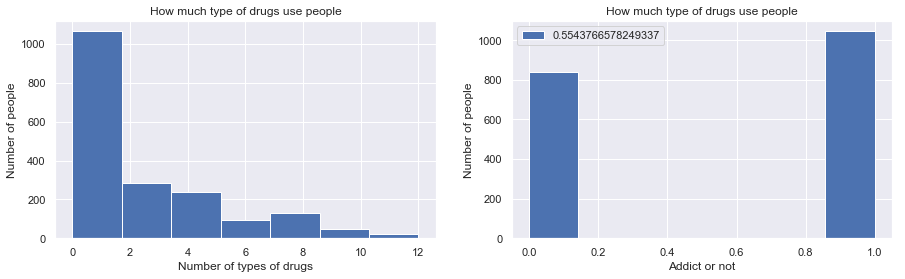

In [203]:
fig, ax = plt.subplots(figsize = (15,4))
y_sum = y_dr_2.sum(axis=1)
y_sum = np.floor(y_sum)

plt.subplot(1,2,1)
plt.hist(y_sum.values, bins = 7);
plt.title('How much type of drugs use people')
plt.xlabel('Number of types of drugs')
plt.ylabel('Number of people')

y_sum = pd.DataFrame(threshbin(0, np.array(y_sum).reshape(-1,1)))

plt.subplot(1,2,2)
plt.hist(y_sum.values, bins = 7); #We added 7 bins to clearly see that there are only 0 and 1 labels. 
plt.title('How much type of drugs use people')
plt.xlabel('Addict or not')
plt.ylabel('Number of people')
plt.legend(y_sum.mean())

# Here we finally have our target!
y_sum, where '0' is dedicated to people who don't use something at least a year. And '1' is dedicated to addicts, who use 1 or more drugs and have used it in last year or earlier 
We also recieve a balanced dataset! (55% of ones, and 45% of zeros). We recieve more o less equal number of each class representatives, that is good for future learning

# Step 3 

Perform an exploratory analysis of the data via visualization with Seaborn. Try to find meaningful patterns in the data which can be used to make machine learning task more specific or to help with selection and tuning ML models. Perform additional preprocessing of your data if your findings suggest this (again, all steps should be motivated). If there are several options of target variables, you can select some of them after this step with a couple of sentences explaining your choice. 

# interim conclusion
On this step we have clear target(y_sum), no NaN values, clear explanation of X and normalized input data(X_norm). 
Let's have a look on our input data and make a more hard suggestion what can be our feature.



In [204]:
X.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


Let's have a look how our 5 personality measurements are corelated to the target

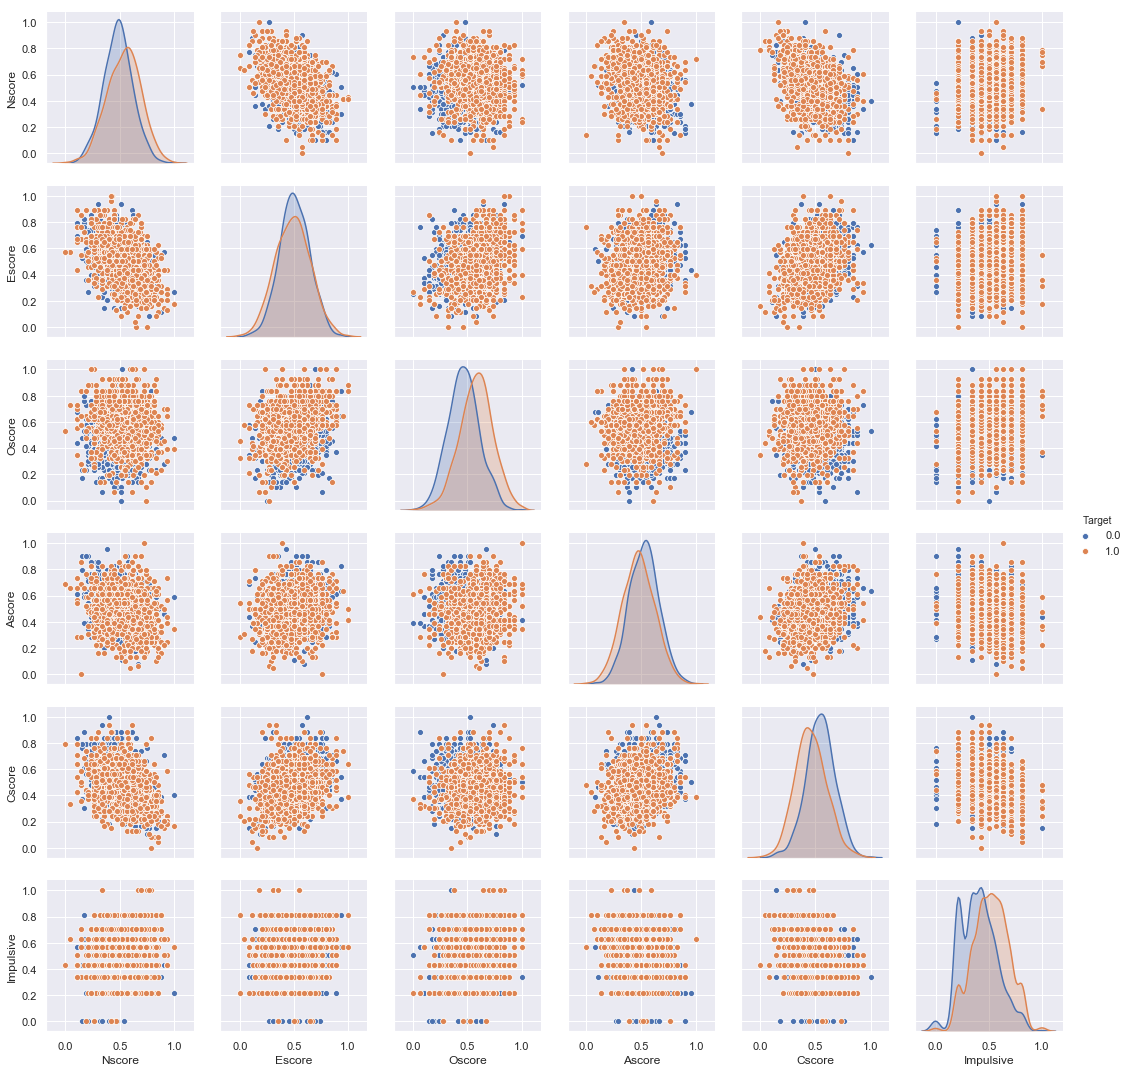

In [205]:
X_f = X_norm.drop(['Age', 'Gender', 'Country', 'Ethnicity', 'Education', 'SS'], axis=1)
df = X_f
df = df.assign(Target=y_sum)
sns.pairplot(df, hue='Target', vars=X_f);


I suggested to drop ID because it's not a feature, 'Nscore', 'Escore', 'Cscore', 'Ascore', 'Oscore' have very similar distributions.
There we have only  'Impulsive' that is could be explored.
Let's have a look on other features

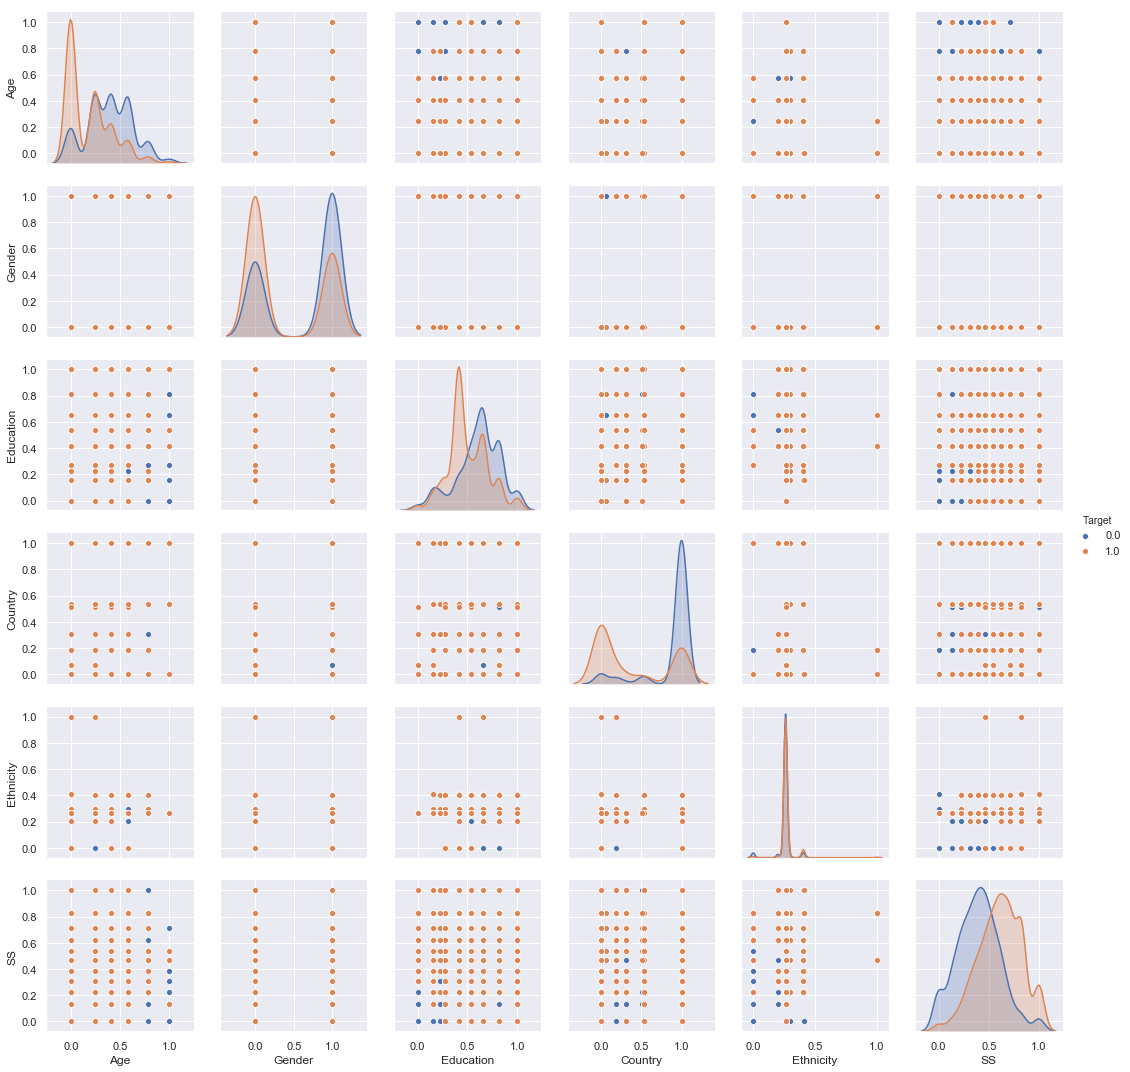

In [206]:
X_f = X_norm.drop(['Nscore', 'Escore', 'Cscore', 'Ascore', 'Oscore', 'Impulsive'], axis=1)
df = X_f
df = df.assign(Target=y_sum)
sns.pairplot(df, hue='Target', vars=X_f);

And here we have much more interesting situation. 'Age', 'Gender', 'Country', 'Ethnicity', 'Education', 'SS' have interesting offsets. We will keep this features and look deeply at age, gender, education and country

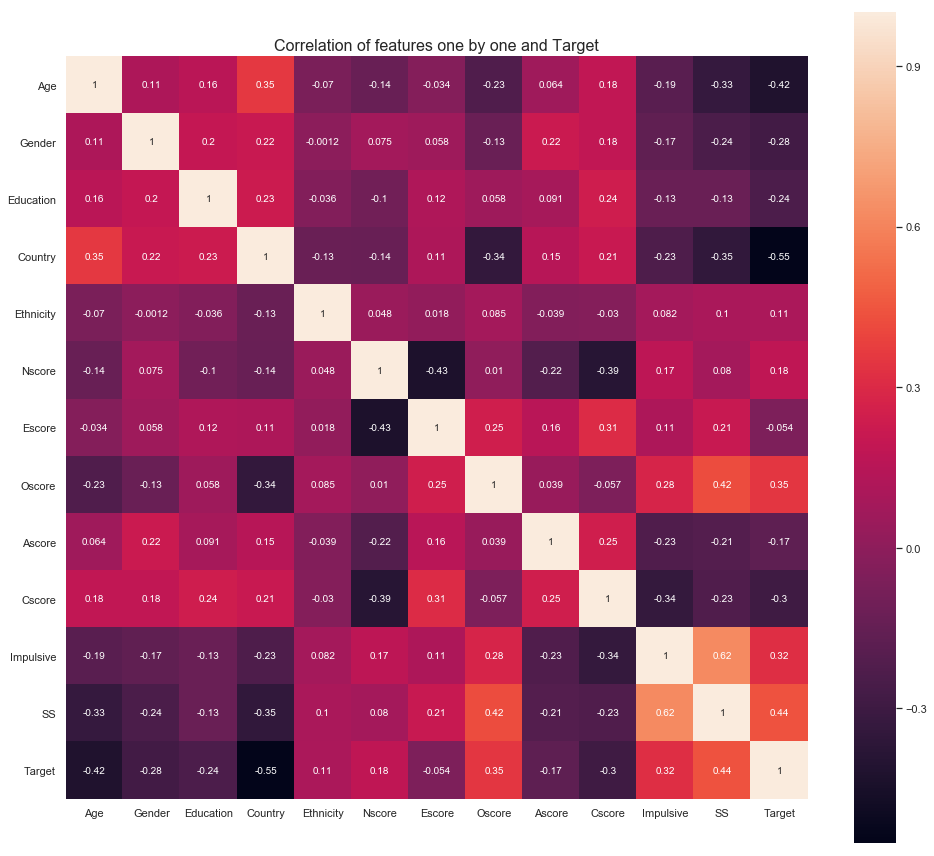

In [495]:
data_f = X_norm
data_f = data_f.assign(Target=y_sum)

fig, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of features one by one and Target',y=1,size=16)
sns.heatmap(data_f.corr(), square = True, vmax=1, annot=True)
plt.tight_layout()
plt.show()

In begining I suggested that drug consumption depends on country. Here we have a high enough inverse correlation (in case of country it's not very important that it's inverse, we had a categorical feature before encoding), we also saw that they are depends on distributions. Our target is also depends on Age, SS and other features. It also seems that it's not correlated with Escore, Ascore, Cscore, Nscore and Ethnicity
I can't make a hard suuggestion about gender and education beacuse we had interesting situation on previous plot

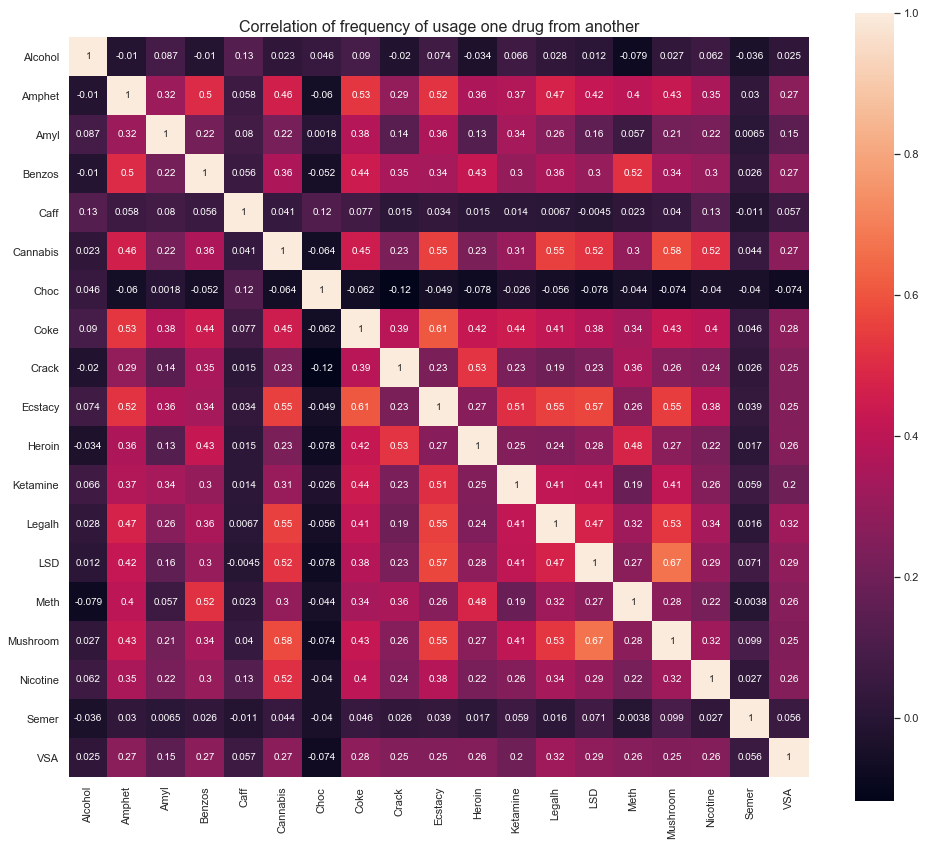

In [207]:
fig, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of frequency of usage one drug from another',y=1,size=16)
sns.heatmap(y.corr(), square = True, vmax=1, annot=True)
plt.tight_layout()
plt.show() 

It's a very infromative and interesting map. We could make some assumptions here. 
1. Chocolate and alcohol are very low correlated with everything. It was right prediction to drop them
2. Correlation between using mushrooms and LSD is high
3. Correlation between frequency of using Nicotine and Cannabis is high
4. Use of ectasy is correlated with use of coke
5. Semer is low sorrelated with everything, I suppose that it's due to low number of  Semer-users in dataset

We can find here much more information but what is important for us we have already mentioned

Let's change our features. On this step we can make a suggestion what features to drop, what are not influence on the target. We will also add our dropped targets(Alcohol, Choc, Caff and Nicotine into a features) due to the reasons that were represented above duing plot analysis
We wouldn't have any problebms with normalization due to the reason that our dropped targets are also normalized. As features we will use them with scale(where 0 - is never used and 1 - used today)

In [269]:
X_dr = X_norm.drop(['Ethnicity','Nscore', 'Escore', 'Cscore', 'Ascore'], axis=1)
X_dr_as = X_dr.assign(Alcohol=y.Alcohol, Choc = y.Choc, Caff = y.Caff, Nicotine = y.Nicotine)
X_norm_as = X_norm.assign(Alcohol=y.Alcohol, Choc = y.Choc, Caff = y.Caff, Nicotine = y.Nicotine)
X_norm_as.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Choc,Caff,Nicotine
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.278405,0.499735,0.550215,0.604629,0.264556,0.514137,0.499975,0.530058,0.499965,0.499944,0.469585,0.518770,0.772502,0.851105,0.913970,0.533422
std,0.247867,0.500133,0.214936,0.457463,0.055146,0.148125,0.152332,0.161318,0.143957,0.143969,0.174906,0.240913,0.221875,0.181552,0.185775,0.402322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.412820,0.000000,0.262143,0.413474,0.393845,0.413998,0.412490,0.405822,0.337920,0.388117,0.666667,0.833333,0.833333,0.166667
50%,0.246475,0.000000,0.537681,1.000000,0.262143,0.520448,0.500507,0.527023,0.497505,0.499040,0.428474,0.539559,0.833333,0.833333,1.000000,0.500000
75%,0.409137,1.000000,0.653938,1.000000,0.262143,0.607577,0.597404,0.647268,0.609827,0.584415,0.565343,0.710933,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# interim conclusion
Now we have vizualized understanding of our features and binary Target.
We have new feature representation and we are going to choose an ML model and prepare cross-validation procedure to estimate the quality of prediction.
We would also try feature selection after chosing our model
# Step 4
Build a proper cross-validation procedure; select an appropriate measure of quality. Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction. 

Let's start with proper cross-validation function. 
We have target: y_sum which is balanced. So we can use cross_val_score to estimate our results. 
It's important to use the same estimation for different classifiers, that's why I wrote a function to split dataset in the same way each time(but with shuffle for proper results)
We will use Kfold to divide our dataset. We alse fixed our random_state to recieve the same result from try to try

In [279]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning) #to ignore not important warnings

In [283]:
def validation_mine(clf, X, y, print_F = True, return_pred = False):
    kfold = KFold(n_splits=5, shuffle=True, random_state=24) # 5-fold CV
    cv = kfold.split(X, y) #  make the split
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
    y_pred = cross_val_predict(clf, X, y)
    if print_F:
        print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )
        print(classification_report(y, y_pred))
    if return_pred:
        return scores, y_pred
    else:
        return scores

We will start with Logistic Regression. We have binary target and it may show a good result here

We have free types of features (only 1st is raw, Others are normalized): 
1. X without any preparations 
2. X_dr with dropped columns 
3. X_dr_as with dropped columns and added 4 new features
4. X_norm with normalization but without dropping or adding any features
5. X_norm_as with added 4 new features

We will check our score and after that have a look on metrics: precision and recall

In [284]:
print(validation_mine(LogisticRegression(), X, y_sum))
print(validation_mine(LogisticRegression(), X_dr, y_sum))
print(validation_mine(LogisticRegression(), X_dr_as, y_sum))
print(validation_mine(LogisticRegression(), X_norm, y_sum))
print(validation_mine(LogisticRegression(), X_norm_as, y_sum))

KFold score: 0.813 ± 0.013
             precision    recall  f1-score   support

        0.0       0.68      0.62      0.65       840
        1.0       0.71      0.77      0.74      1045

avg / total       0.70      0.70      0.70      1885

[0.83023873 0.79310345 0.81432361 0.81962865 0.80636605]
KFold score: 0.805 ± 0.006
             precision    recall  f1-score   support

        0.0       0.73      0.80      0.76       840
        1.0       0.83      0.76      0.79      1045

avg / total       0.78      0.78      0.78      1885

[0.80636605 0.79840849 0.81167109 0.81167109 0.79840849]
KFold score: 0.824 ± 0.012
             precision    recall  f1-score   support

        0.0       0.75      0.81      0.78       840
        1.0       0.83      0.78      0.81      1045

avg / total       0.80      0.79      0.79      1885

[0.83289125 0.80371353 0.83023873 0.81962865 0.83554377]
KFold score: 0.812 ± 0.016
             precision    recall  f1-score   support

        0.0       0.74

Let's analyze our results. First of all, we have balanced precision and recall, our estimation is valid and it's logically (we have balaced classes)
1. X without any preparations: 0.813 ± 0.013
2. X_dr with dropped columns: 0.805 ± 0.006
3. X_dr_as with dropped columns and added 4 new features: 0.824 ± 0.012
4. X_norm with normalization but without dropping or adding any features: 0.812 ± 0.016
5. X_norm_as with added 4 new features: 0.827 ± 0.015
What can we conclude from this? We have very close results on X and X_norm, it seems that normalization were not essential in this situation. X with dropped column gave the worst result, our suggestion about dropping wasn't correct. And it's logically, that in this case we lose some information that is important anyway. But our suggestion about adding new features seems correct, we achieved better results with them. 


Let's try another classifier and look for hyperparameters for it. We will use kNeighborsClassifier and our first research is to find such number of neighbors, that would be enough to not overload our model

0.8222811671087532
14


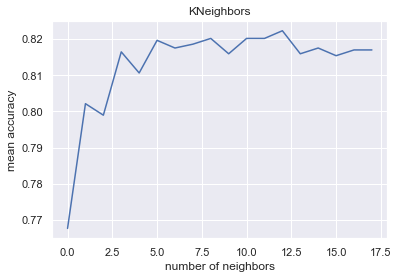

In [399]:
mas = []
for i in range (2,20):
    mas.append((validation_mine(KNeighborsClassifier(n_neighbors=i), X_norm_as, y_sum,print_F = False)).mean())
    #print(str(i)+''+str(mas))
plt.ylabel('mean accuracy')
plt.xlabel('number of neighbors')
plt.title('KNeighbors')
print(np.array(mas).max())
plt.plot(mas);
print(np.array(mas).argmax()+2)

Here we see, that best result (0.8222811671087532) is with 14 neighbors, but we have at least the same result with less neighbors. We were working here with our best features(X_norm_as)
But let's try to use feature selection. 

In [296]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [363]:
def Selectbest(X,y, par):
    X_w_1 = SelectKBest(f_classif, par).fit_transform(X, y)
    X_w_2 = SelectKBest(mutual_info_classif, par).fit_transform(X, y)
    return X_w_1, X_w_2

We are going to chose best features. We don't know what paramters would work better. We will find them

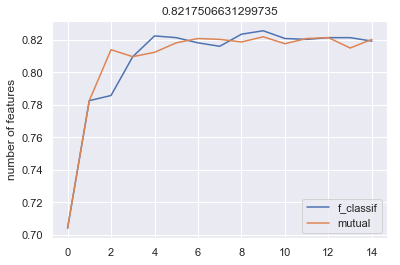

In [400]:
w_1 = []
w_2 = []
for i in range(1,X_norm_as.shape[1]):
    X_w_1,X_w_2 = Selectbest(X_norm_as, y_sum, i)
    w_1.append(validation_mine(KNeighborsClassifier(n_neighbors=14), X_w_1, y_sum, print_F=False).mean())
    w_2.append(validation_mine(KNeighborsClassifier(n_neighbors=14), X_w_2, y_sum, print_F=False).mean())
plt.plot(w_1, label = 'f_classif')
plt.plot(w_2, label = 'mutual')
plt.ylabel('accuracy')
plt.ylabel('number of features')
plt.title(str(np.array(w_2).max()))
plt.legend()

The plot present us the results where 4 features give the best result. It's better than we have on previous step and close but not enough to our best result on Logistic Regression. Let's try this parameters on it. 

In [396]:
print(validation_mine(LogisticRegression(), X_w_2, y_sum))

KFold score: 0.827 ± 0.015
             precision    recall  f1-score   support

        0.0       0.76      0.81      0.78       840
        1.0       0.84      0.79      0.81      1045

avg / total       0.80      0.80      0.80      1885

[0.84615385 0.80636605 0.83819629 0.81167109 0.83289125]


We didn't recieve any gain. Let's try decision tree

In [397]:
from sklearn.tree import DecisionTreeClassifier

0.8122015915119365
1


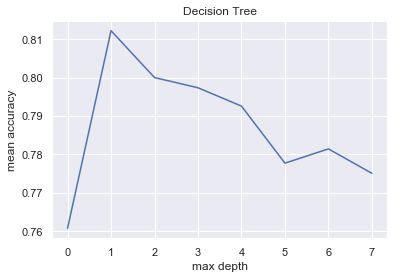

In [401]:
mas = []
for i in range (2,10):
    mas.append((validation_mine(DecisionTreeClassifier(max_depth=i), X_norm_as, y_sum,print_F = False)).mean())
plt.ylabel('mean accuracy')
plt.xlabel('max depth')
plt.title('Decision Tree')
print(np.array(mas).max())
plt.plot(mas);
print(np.array(mas).argmax())

It's absolutely clear that we needn't very deep tree. 2 step is enough! But our final result is still near the same:0.8122015915119365

In [382]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

0.8334217506631301
0.8312997347480107
30
31


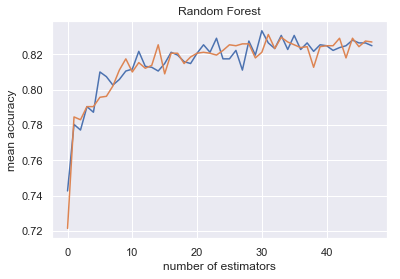

In [416]:
mas = []
mas1 = []
for i in range (2,50):
    mas.append((validation_mine(RandomForestClassifier(n_estimators = i), X_norm_as, y_sum,print_F = False)).mean())
    mas1.append((validation_mine(RandomForestClassifier(n_estimators = i), X_w_2, y_sum,print_F = False)).mean())
plt.ylabel('mean accuracy')
plt.xlabel('number of estimators')
plt.title('Random Forest')
print(np.array(mas).max())
print(np.array(mas1).max())
plt.plot(mas, label = 'X_norm_as');
plt.plot(mas1,label = 'X_w_2');
print(np.array(mas).argmax())
print(np.array(mas1).argmax())

The result is a little bit better than we have on other classifiers. Best number of estimators is 32 (mean accuracy 0.833421750663130) for our features and 33 for reduced number of features. 

Here I've tried to implement gridSearch
It was just to be sure that my search was right, I wouldn't provide new results here. You can skip this paragraph 

In [410]:
# build a classifier
from scipy.stats import randint as sp_randint
from time import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(n_estimators=36)

In [413]:
#Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_norm_as, y_sum)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X_norm_as, y_sum)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 10.07 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.825 (std: 0.071)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 9}

Model with rank: 1
Mean validation score: 0.825 (std: 0.057)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_split': 9}

Model with rank: 3
Mean validation score: 0.824 (std: 0.056)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_split': 7}

GridSearchCV took 37.09 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.824 (std: 0.058)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.823 (std: 0.061)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_fe

# Conslusion 
Here we have finished our research about drug consumption. 
We have build a proper cross-validation procedure; select an appropriate measure of quality. Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction. 
Analyze the obtained results (interesting findings, remarks on ML experiments, the applicabilit

We used Kfold with shuffle, fixed random state and 5 splits to prepare our data for learning and cross-validation. We used cross-val_score to estimate our results(mean and std). We also were looking for metrics in some cases. 

Our first model was based on Logistic Regression: we had balanced precision and recall, we also understand here what were right or not right decision in feature preparation( normalization were not essential in this situation, our suggestion about dropping wasn't correct but our suggestion about adding new features seems correct, we achieved better results with them). Best mean accuracy is 0.827 ± 0.015. After this step we were working only on X_norm_as

Next classifier was kNeighbors, best result (0.8222811671087532) is with 14 neighbors
After that I was tried to work with feature selection on kNeighbors and it gave a small gain with 4 features. But Logistic regression were still better.

Then I come to decision tree and research the depth. It gave the result that low depth is still better.

My best result was achieved on  
### Random Forest with  number of estimators = 32 (mean accuracy 0.833421750663130).

I'm totally sure that these result can be useful in real life: we detect addicts who has used drug in last year, not only in last day or a week. 
In addition, with our reduced model, we can forecast drug consumer by only demographic and 5 personality measurement features. 

And know we will try to create ML model for multilabel classification. We will try to predict what sort of drug our person use

Additional research for multilabel classification. 

We will start with our prepared data and try One  vs Rest classifier. It would be more convinient here to use another cross-validation method. We will use train-test-split. We are going to work with very unbalanced data, that's why our estimation would roc-auc. But for first estimation we will use accuracy score

In [423]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_as, y_dr_2, test_size = 0.3, random_state =42)
clf = OneVsRestClassifier(LinearSVC(random_state=42)).fit(X_train, y_train)
y_predicted = clf.predict(X_train) 
print('Accuracy of train is {}'.format(accuracy_score(y_train, y_predicted)))
y_predicted = clf.predict(X_test) 
print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))
print(1/y_dr_2.shape[1])

Accuracy of train is 0.4397270659590599
Accuracy of test is 0.42579505300353354
0.07142857142857142


Of course, our result is much more lower from drug consumption prediction in first part of the work. we have a whole model for many targets. But it's much more better than a coin through

My suggestion is to learn 1 classifier for each drug. 
It is also need to estimate our results properly. Below we are going to create a function to estimate our results with ROC-AUC

In [718]:
from itertools import cycle
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from scipy import interp
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore') 

In [732]:
def roc_curve_m(X, y, printF = True, returnF = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)
    clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
    probs = clf.predict_proba(X_test) 
    y_predicted = clf.predict(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    if (printF):
        print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))
        print(classification_report(y_test, y_predicted))
        print(confusion_matrix(y_test, y_predicted))
    if (returnF):
        score = accuracy_score(y_test, y_predicted)
        return fpr, tpr, roc_auc, score

In [733]:
for i in range(0, y_dr_2.shape[1]):
    roc_curve_m(X_norm_as, y_dr_2.iloc[:,i])

Accuracy of test is 0.7968197879858657
             precision    recall  f1-score   support

        0.0       0.84      0.91      0.87       438
        1.0       0.57      0.41      0.48       128

avg / total       0.78      0.80      0.78       566

[[398  40]
 [ 75  53]]
Accuracy of test is 0.9257950530035336
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96       524
        1.0       0.00      0.00      0.00        42

avg / total       0.86      0.93      0.89       566

[[524   0]
 [ 42   0]]
Accuracy of test is 0.7491166077738516
             precision    recall  f1-score   support

        0.0       0.77      0.91      0.83       393
        1.0       0.65      0.39      0.49       173

avg / total       0.73      0.75      0.73       566

[[357  36]
 [106  67]]
Accuracy of test is 0.7968197879858657
             precision    recall  f1-score   support

        0.0       0.81      0.96      0.88       434
        1.0       0.66 

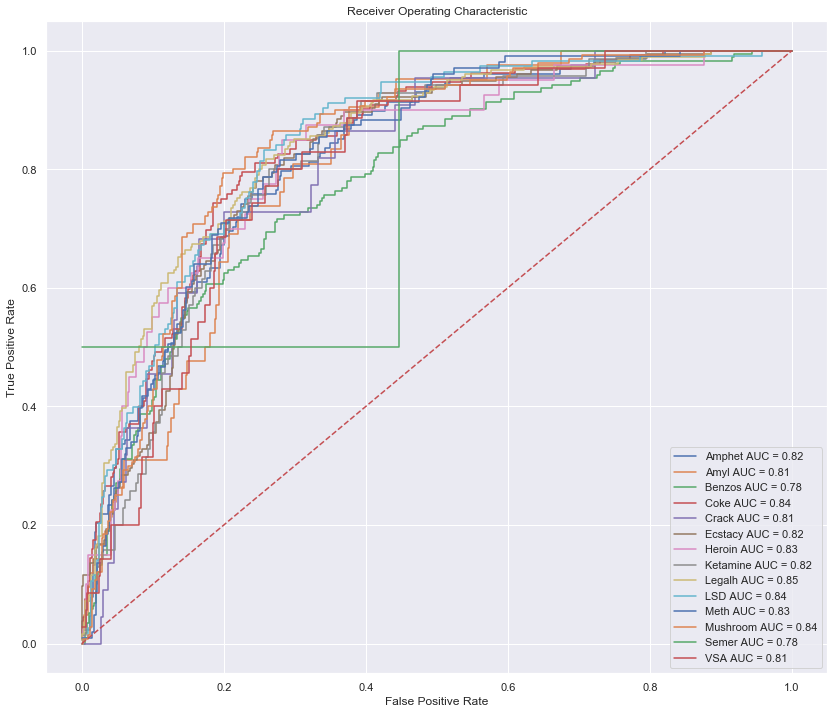

In [597]:
fig, ax = plt.subplots(figsize = (14,12))
scores = []
AUC = [] 
for i in range(0, y_dr_2.shape[1]):
    fpr, tpr, roc_auc, score = roc_curve_m(X_norm_as, y_dr_2.iloc[:,i], returnF=True, printF=False)
    scores.append(score)
    AUC.append(roc_auc)
    plt.plot(fpr, tpr, label = str(y_dr_2.columns[i])+' '+'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
results = pd.DataFrame(data = [scores, AUC],columns=y_dr_2.columns)

In [598]:
results

,Amphet,Amyl,Benzos,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushroom,Semer,VSA
0,0.79682,0.925795,0.749117,0.796820,0.961131,0.754417,0.929329,0.876325,0.791519,0.814488,0.823322,0.780919,0.996466,0.938163
1,0.82413,0.811887,0.782788,0.839111,0.813085,0.823185,0.827281,0.816215,0.846265,0.844693,0.828367,0.841834,0.776596,0.807049


In [559]:
y_dr_2.Semer.describe()

count    1885.000000
mean        0.001592
std         0.039873
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Semer, dtype: float64

# Interim conclusion
Let's estimate our results: we have a very high accuracy (best is 0.996) but that result is not valid. And on ROC curve we see the real results. AUC score is from 0.78 to 0.85. It's also higher than coin-through but also not close to 1.
And we see here some problems: the biggest problem is with Semer, the reason of this problem is unbalanced classes: with have very kittle number of this drug's addicts.
I've also looked in precision and recall and in some cases(not only for Semer) I have '1' for '0' class Recall, and '0' for '1' class Recall. And it means that we decide to call all people not addicts and recieve high accuracy, due to the reason that our target is unbalanced. 
The desicion to this problem is to use weighted function, and to increase the level of Recall for "1" class(decrease false positive)

We will use gridSearch to find best weights for our classifier. As an estimator, we will use logistic regression as in previous part. We will try to increase our accuracy, looking for f1 score
There we are going to have a problem with splits: in case of Semer and other rarely used drugs we will have warning about 0 representatives of alternative class. We will split our dataset only in 2 parts to incease the probability of success

In [725]:

def weight_search(y, cv):
    weights = np.linspace(0.05, 0.95, 20)

    gsc = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid={
            'class_weight': [{0: x, 1: 1.0-x} for x in weights]
        },
        scoring='f1_macro',        
        cv=2
    )
    #metrics.f1_score(y_test, y_predicted, average='weighted', labels=np.unique(y_predicted))
    grid_result = gsc.fit(X_norm_as, y)

    #print("Best parameters : %s" % grid_result.best_params_)

    # Plot the weights vs f1 score
    dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                           'weight': weights })
    dataz.plot(x='weight')
    plt.title(y.name)
    return grid_result.best_params_

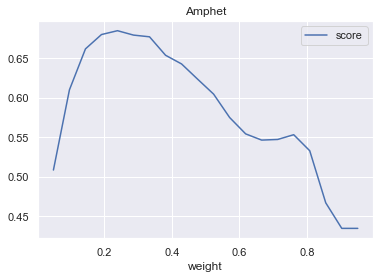

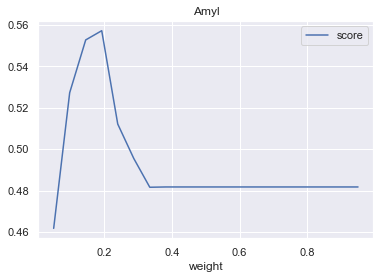

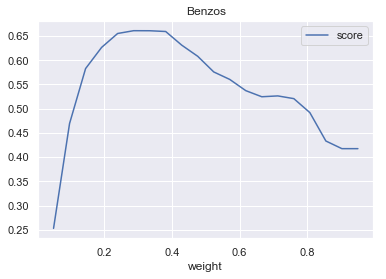

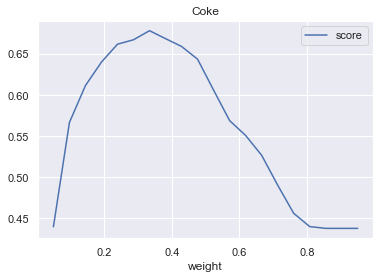

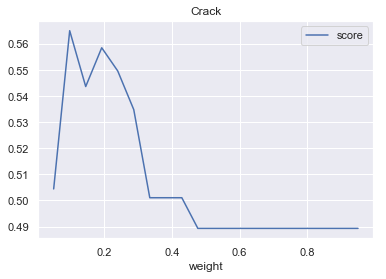

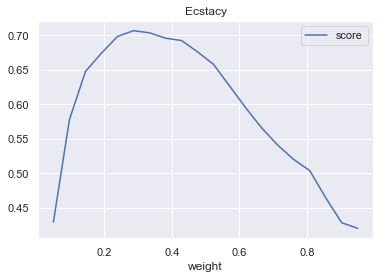

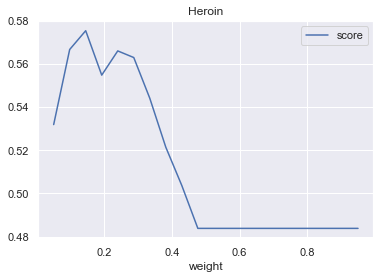

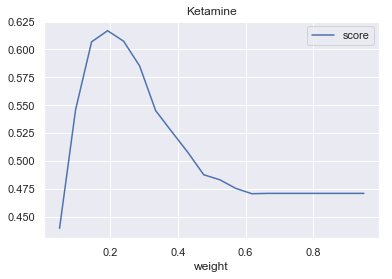

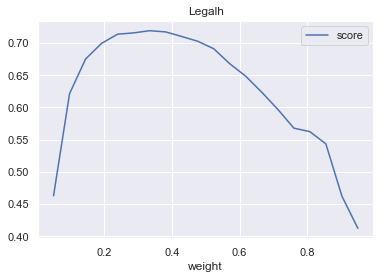

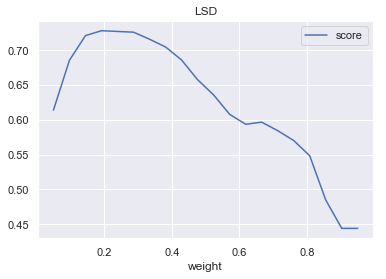

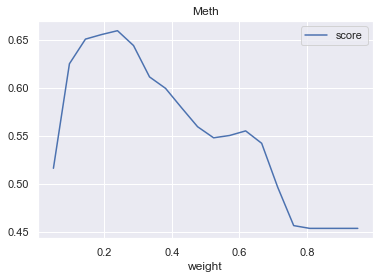

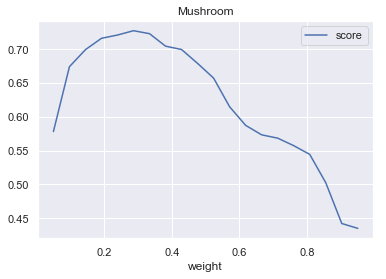

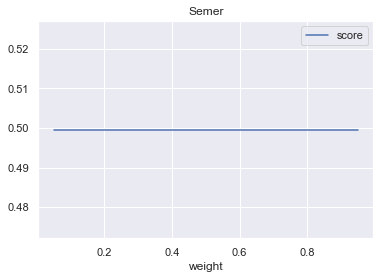

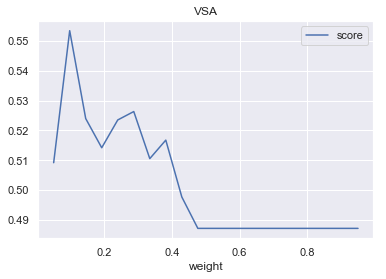

In [726]:
weights = []
for i in range(0,y_dr_2.shape[1]):
    weights.append(weight_search(y_dr_2.iloc[:,i], 2))

In [729]:
weights_mas = []
for i in range(0, len(weights)):
    weights_mas.append(weights[i].get('class_weight'))
weights_mas= np.array(weights_mas)
print(weights_mas)

[{0: 0.23947368421052628, 1: 0.7605263157894737}
 {0: 0.19210526315789472, 1: 0.8078947368421052}
 {0: 0.28684210526315784, 1: 0.7131578947368422}
 {0: 0.33421052631578946, 1: 0.6657894736842105}
 {0: 0.09736842105263158, 1: 0.9026315789473685}
 {0: 0.28684210526315784, 1: 0.7131578947368422}
 {0: 0.14473684210526316, 1: 0.8552631578947368}
 {0: 0.19210526315789472, 1: 0.8078947368421052}
 {0: 0.33421052631578946, 1: 0.6657894736842105}
 {0: 0.19210526315789472, 1: 0.8078947368421052}
 {0: 0.23947368421052628, 1: 0.7605263157894737}
 {0: 0.28684210526315784, 1: 0.7131578947368422} {0: 0.05, 1: 0.95}
 {0: 0.09736842105263158, 1: 0.9026315789473685}]


And here we recieve our weights. It was expected that we need high weigt for 1 class and low weight for 0 class, and now we know the best weights for our goal. Let's change our function to add an ability to add weights and estimate our results

In [728]:
def roc_curve_m(X, y, w, printF = True, returnF = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state =42)
    clf = OneVsRestClassifier(LogisticRegression(class_weight=w)).fit(X_train, y_train)
    probs = clf.predict_proba(X_test) 
    y_predicted = clf.predict(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    if (printF):
        print('Accuracy of test is {}'.format(accuracy_score(y_test, y_predicted)))
        print(classification_report(y_test, y_predicted))
        print(confusion_matrix(y_test, y_predicted))
    if (returnF):
        score = accuracy_score(y_test, y_predicted)
        return fpr, tpr, roc_auc, score

In [730]:
for i in range(0, y_dr_2.shape[1]):
    roc_curve_m(X_norm_as, y_dr_2.iloc[:,i], weights_mas[i])

Accuracy of test is 0.7348886532343585
             precision    recall  f1-score   support

        0.0       0.91      0.73      0.81       729
        1.0       0.45      0.77      0.57       214

avg / total       0.81      0.73      0.75       943

[[529 200]
 [ 50 164]]
Accuracy of test is 0.9236479321314952
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       875
        1.0       0.41      0.13      0.20        68

avg / total       0.90      0.92      0.91       943

[[862  13]
 [ 59   9]]
Accuracy of test is 0.7147401908801697
             precision    recall  f1-score   support

        0.0       0.85      0.72      0.78       661
        1.0       0.52      0.71      0.60       282

avg / total       0.75      0.71      0.72       943

[[475 186]
 [ 83 199]]
Accuracy of test is 0.7762460233297985
             precision    recall  f1-score   support

        0.0       0.88      0.82      0.85       737
        1.0       0.49 

I've tried different types of scores. F1-score-macro is better in our situation beacause we need to increase recall and precision for the '1' class. 
### We still can't detect Semer's users but in other cases our classifier works better. We also didn't lose much in accuracy. Our results are pretty good for our goal
Let's have a look on our new ROC-AUC characteristic

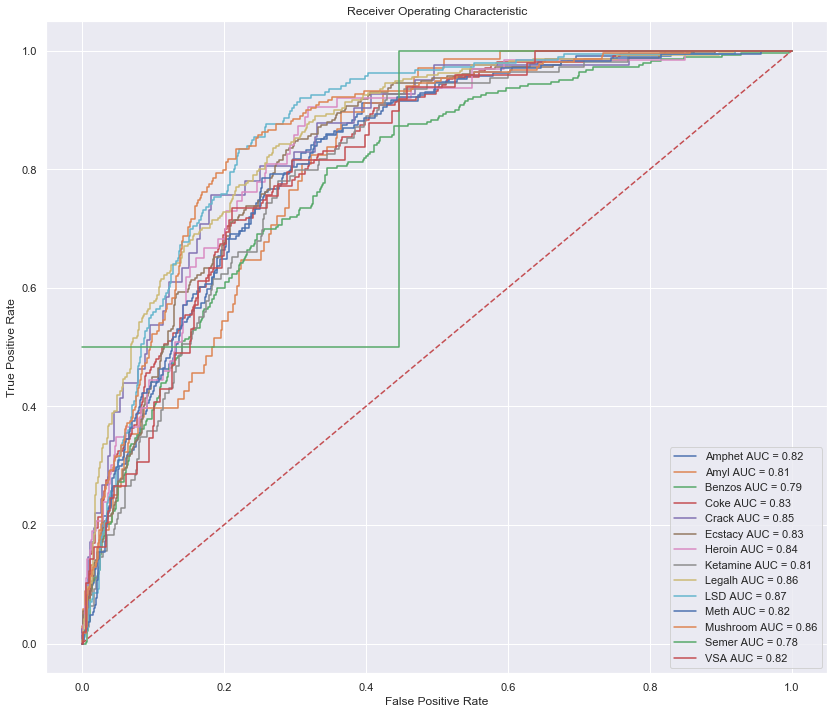

In [731]:
fig, ax = plt.subplots(figsize = (14,12))
scores = []
AUC = [] 
for i in range(0, y_dr_2.shape[1]):
    fpr, tpr, roc_auc, score = roc_curve_m(X_norm_as, y_dr_2.iloc[:,i], weights_mas[i], returnF=True, printF=False)
    scores.append(score)
    AUC.append(roc_auc)
    plt.plot(fpr, tpr, label = str(y_dr_2.columns[i])+' '+'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
results = pd.DataFrame(data = [scores, AUC],columns=y_dr_2.columns)

Roc-curve is very close to previous situation but we have a small gain in some cases(e.g. LSD)
I suppose that on this point we can stop and come to the conclusion. 
# Final conclusion 
We could also try other classifiers with other hyperparameters; write a classifier for light drugs such as cannabis but it could be an object of our furure researchs. 

We totally understand what we did, explaining each step and choice and recieve valid results that could be used in real life. 

We can imagine a scenario where people just take a survey like: "Are you smoking? Where are you from etc" +  take a test about their character(5 personal mesurements) and our model can predict: wether this person is addict or not with accurcy 0.827! We can also predict what sort of drug he use, using our last models, we will recieve wether he use this or that sort of drug with accuracy from 0.72 to 0.92 depending on type of drug.

We also provide an analysis of each step of our work